In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [4]:
df.shape

(51717, 17)

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

# Dropping Columns

In [3]:
columns_to_drop = ['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item']
df.drop(columns=columns_to_drop, inplace=True)

# Changing data-types

In [4]:
df['rate'] = df['rate'].str.replace('/5', '')  # Remove "/5" suffix
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to numeric, setting non-numeric values to NaN

In [5]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [6]:
df['online_order'] = df['online_order'].astype('category')
df['book_table'] = df['book_table'].astype('category')
df['listed_in(type)'] = df['listed_in(type)'].astype('category')
df['listed_in(city)'] = df['listed_in(city)'].astype('category')

In [7]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Missing Values Treatment

In [38]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Treatment of rate column

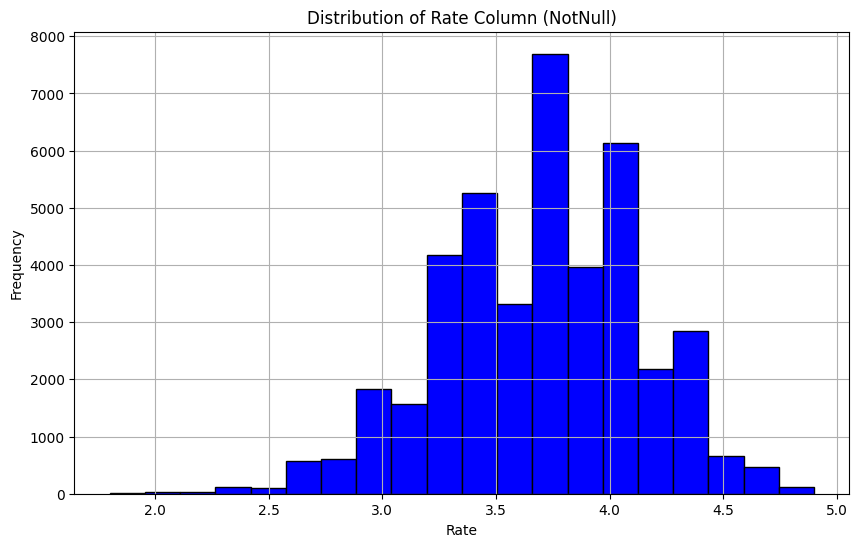

In [8]:
df_not_null_rate = df[df['rate'].notnull()]
plt.figure(figsize=(10, 6))
plt.hist(df_not_null_rate['rate'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Rate Column (NotNull)')
plt.grid(True)
plt.show()

In [9]:
skewness = skew(df_not_null_rate['rate'])
print("Skewness of 'rate' column:", skewness)

Skewness of 'rate' column: -0.32858896795804243


If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [10]:
rate_mean = df['rate'].mean()
df['rate'].fillna(rate_mean, inplace=True)

In [11]:
columns_with_null = ['location', 'rest_type', 'cuisines', 'approx_cost(for two people)']
df.dropna(subset=columns_with_null, inplace=True)

In [ ]:
#Checking for duplicate records

In [12]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 106


In [13]:
df.drop_duplicates(inplace=True)

# EDA(Exploratory Data Analysis) On Target Variable

In [18]:
print(df['approx_cost(for two people)'].describe())

count    51042.000000
mean       555.782983
std        439.293333
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64


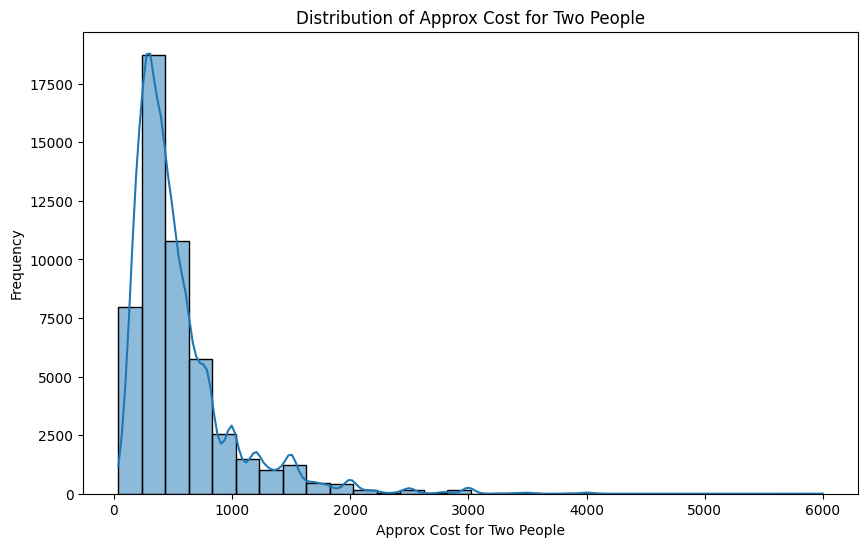

In [37]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True)
plt.title('Distribution of Approx Cost for Two People')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Frequency')
plt.show()

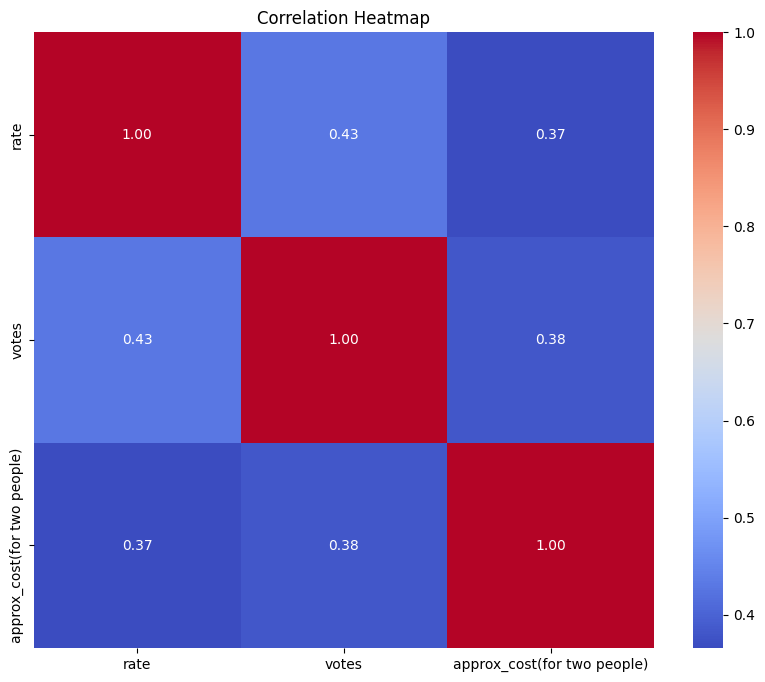

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

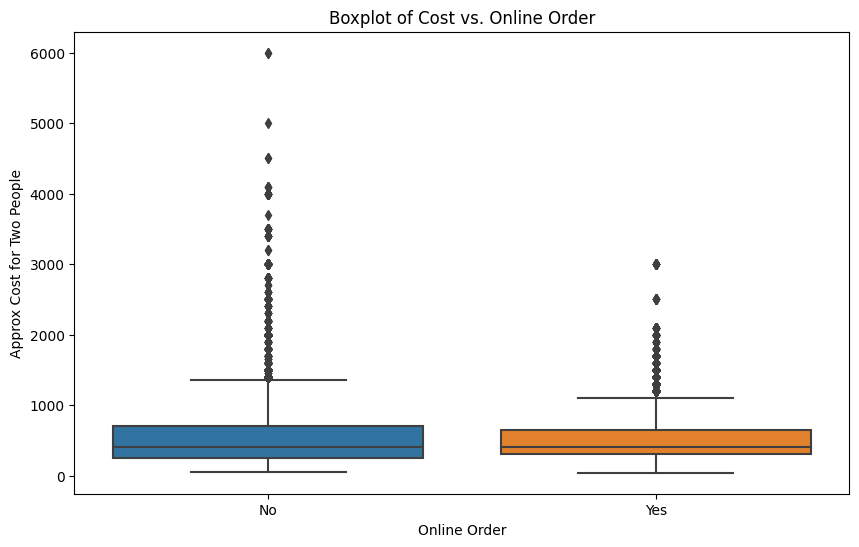

In [40]:
# Boxplot of cost vs. online order
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='approx_cost(for two people)', data=df)
plt.title('Boxplot of Cost vs. Online Order')
plt.xlabel('Online Order')
plt.ylabel('Approx Cost for Two People')
plt.show()

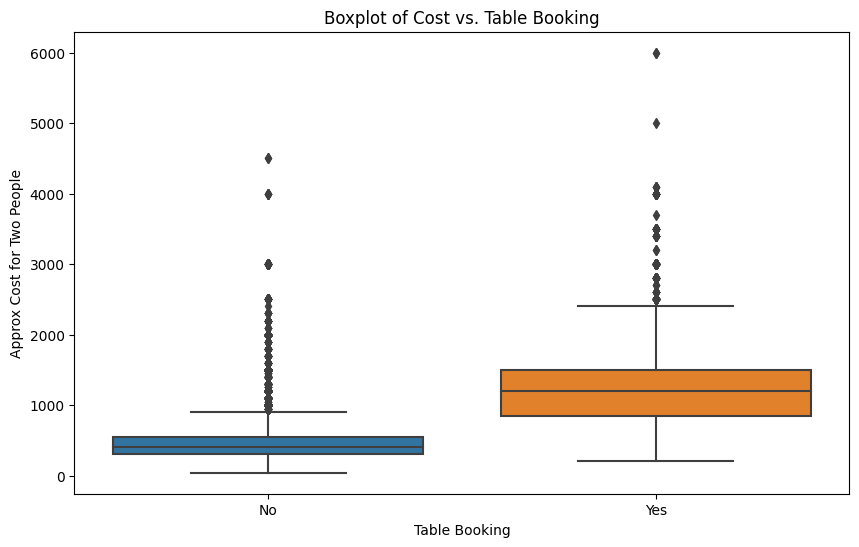

In [47]:
# Boxplot of cost vs. table booking
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='approx_cost(for two people)', data=df)
plt.title('Boxplot of Cost vs. Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Approx Cost for Two People')
plt.show()

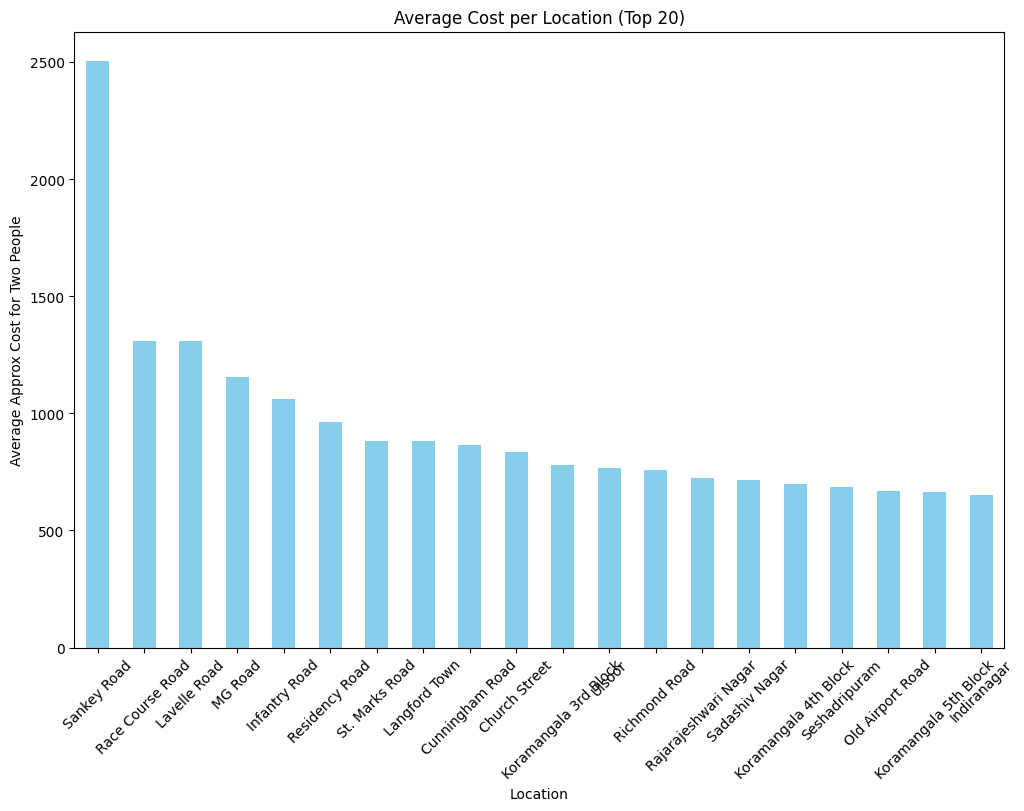

In [48]:
# Barplot of average cost per location
avg_cost_per_location = df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_cost_per_location[:20].plot(kind='bar', color='skyblue')
plt.title('Average Cost per Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Average Approx Cost for Two People')
plt.xticks(rotation=45)
plt.show()

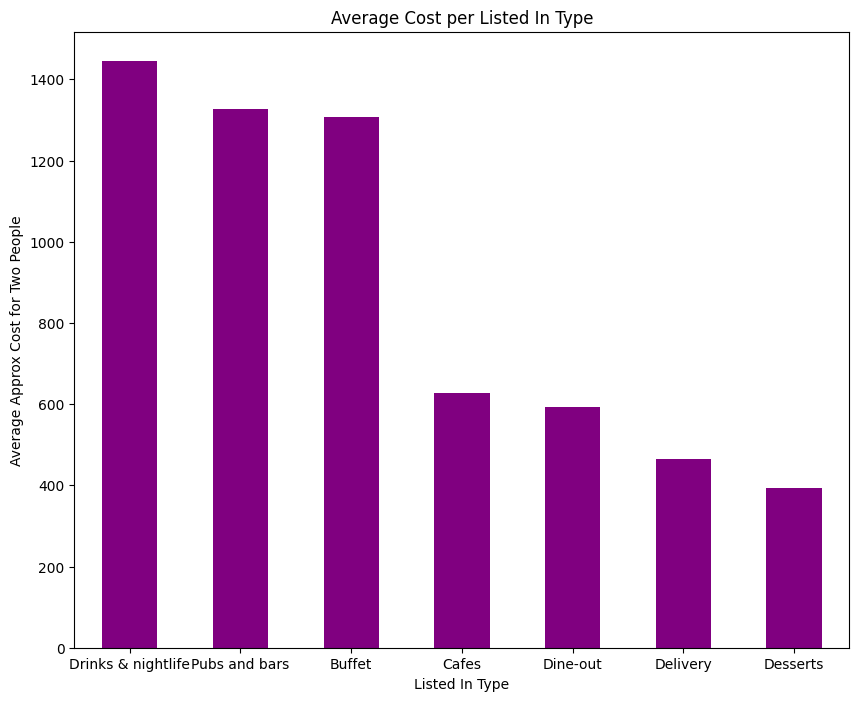

In [50]:
# Barplot of average cost per listed in type
avg_cost_per_type = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
avg_cost_per_type.plot(kind='bar', color='purple')
plt.title('Average Cost per Listed In Type')
plt.xlabel('Listed In Type')
plt.ylabel('Average Approx Cost for Two People')
plt.xticks(rotation=0)
plt.show()

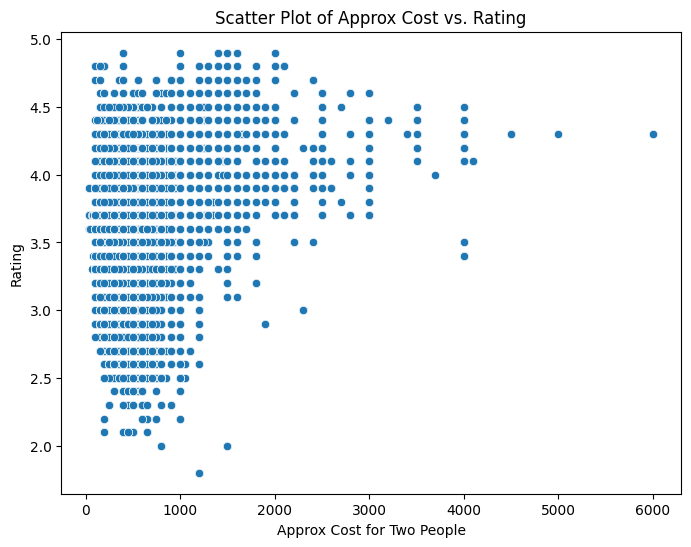

In [57]:
# Correlation between 'approx_cost(for two people)' and 'rate'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Scatter Plot of Approx Cost vs. Rating')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.show()


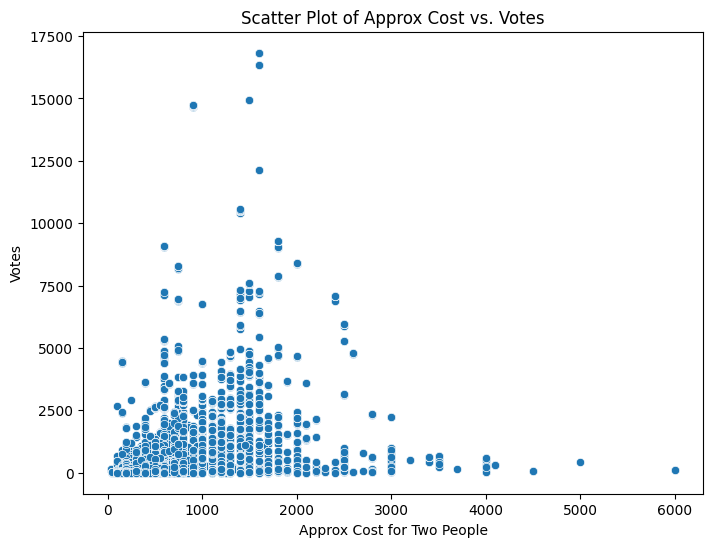

In [73]:
# Correlation between 'approx_cost(for two people)' and 'votes'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)
plt.title('Scatter Plot of Approx Cost vs. Votes')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Votes')
plt.show()

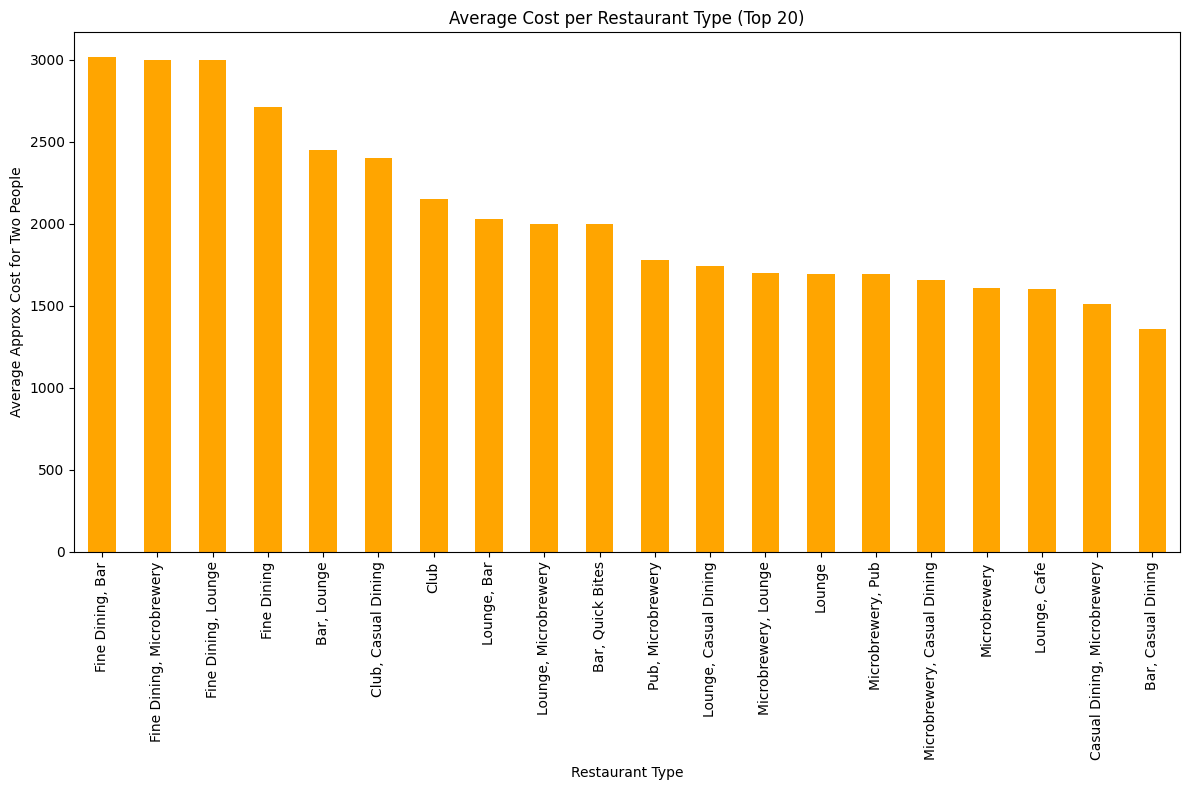

In [68]:
# Calculate the average cost per restaurant type
avg_cost_per_type = df.groupby('rest_type')['approx_cost(for two people)'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
avg_cost_per_type[:20].plot(kind='bar', color='orange')
plt.title('Average Cost per Restaurant Type (Top 20)')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Approx Cost for Two People')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

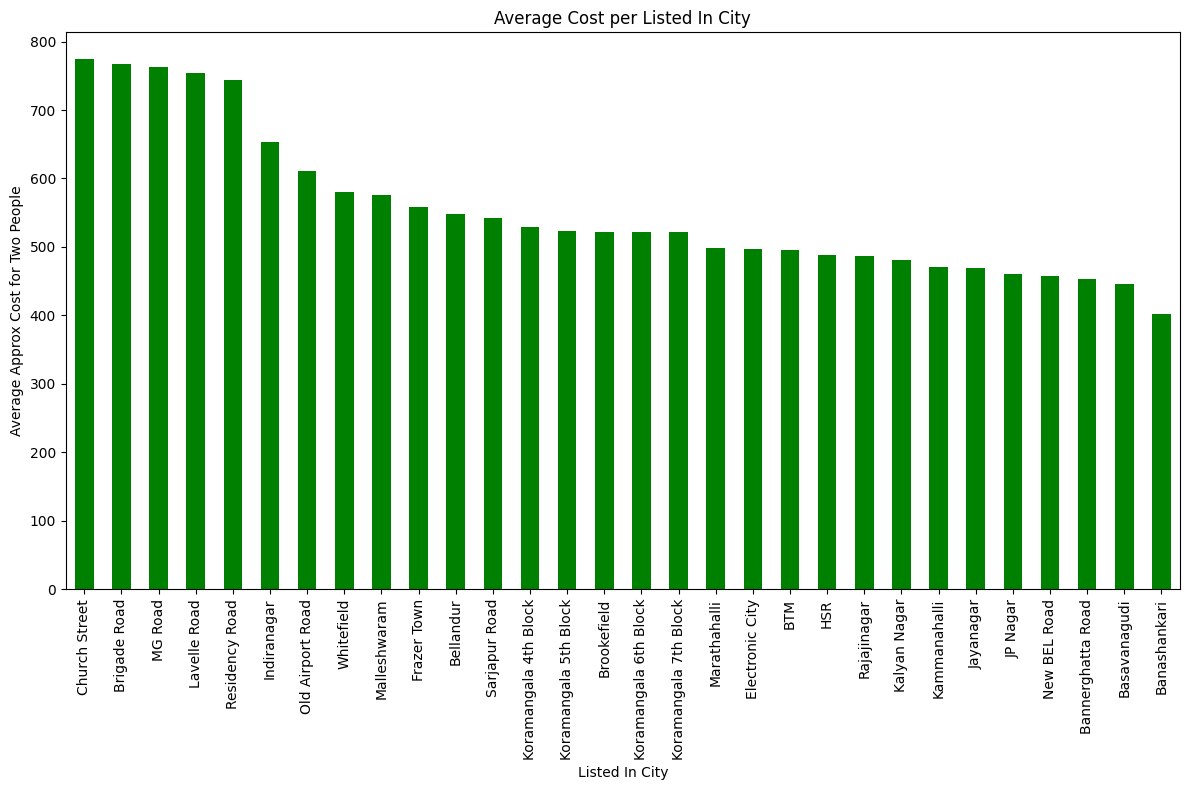

In [69]:
# Calculate the average cost per listed city
avg_cost_per_city = df.groupby('listed_in(city)')['approx_cost(for two people)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_cost_per_city.plot(kind='bar', color='green')
plt.title('Average Cost per Listed In City')
plt.xlabel('Listed In City')
plt.ylabel('Average Approx Cost for Two People')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

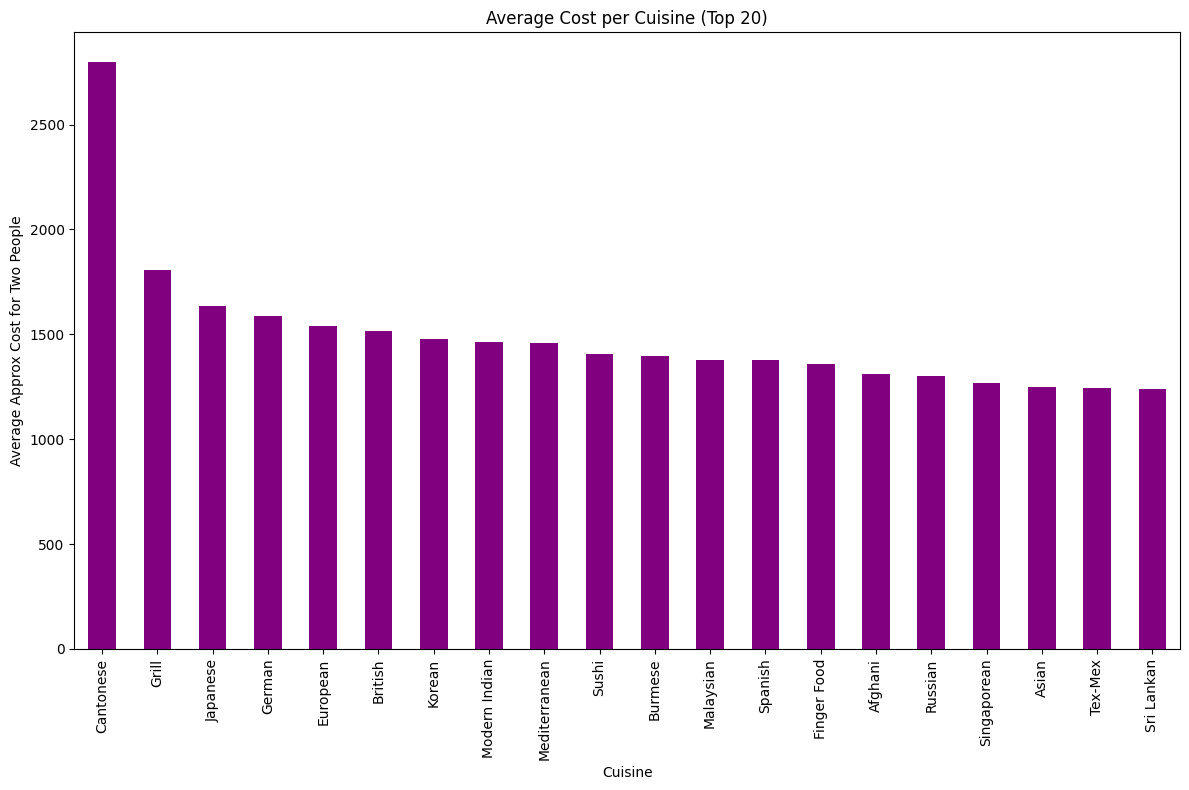

In [72]:
# Extracting individual cuisines from the 'cuisines' column and creating a DataFrame
cuisine_df = df['cuisines'].str.split(', ', expand=True)
cuisine_df.columns = [f'Cuisine_{col}' for col in cuisine_df.columns]

# Combining the cuisine DataFrame with the 'approx_cost(for two people)' column
cuisine_df['Approx_Cost'] = df['approx_cost(for two people)']

# Melt the cuisine DataFrame to have a single 'Cuisine' column
melted_cuisine_df = pd.melt(cuisine_df, id_vars='Approx_Cost', value_vars=cuisine_df.columns[:-1], value_name='Cuisine')

# Group by cuisine and calculate the average cost for each cuisine
cuisine_avg_cost = melted_cuisine_df.groupby('Cuisine')['Approx_Cost'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
cuisine_avg_cost[:20].plot(kind='bar', color='purple')
plt.title('Average Cost per Cuisine (Top 20)')
plt.xlabel('Cuisine')
plt.ylabel('Average Approx Cost for Two People')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


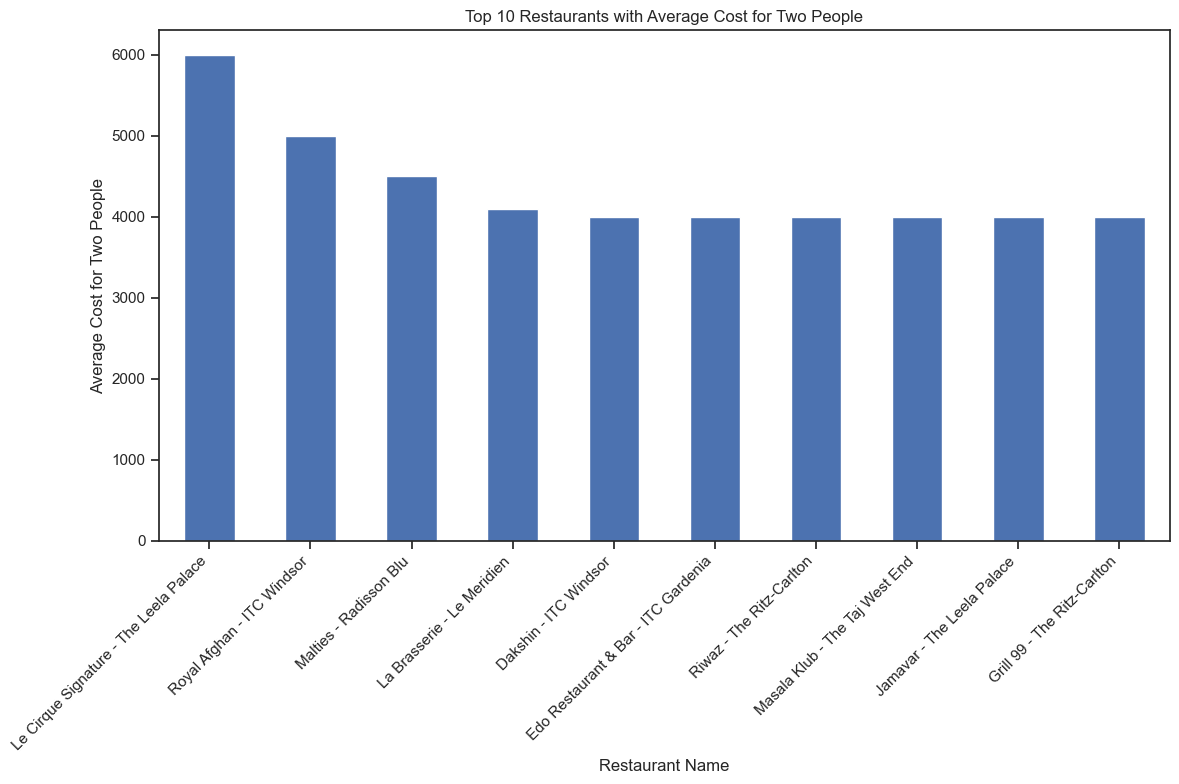

In [117]:
# Calculate the mean approximate cost for two people for each restaurant
restaurant_avg_cost = df.groupby('name')['approx_cost(for two people)'].mean()

# Get the top 30 restaurants with the highest average cost
top_restaurants = restaurant_avg_cost.sort_values(ascending=False).head(10)

# Create a bar chart for the top 30 restaurants with their average cost
plt.figure(figsize=(12, 8))
top_restaurants.plot(kind='bar')
plt.title('Top 10 Restaurants with Average Cost for Two People')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Cost for Two People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analysis of other variable

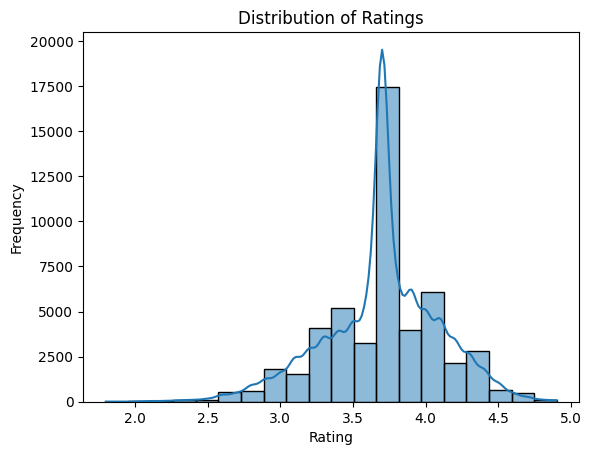

In [74]:
#Distribution of Ratings column
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

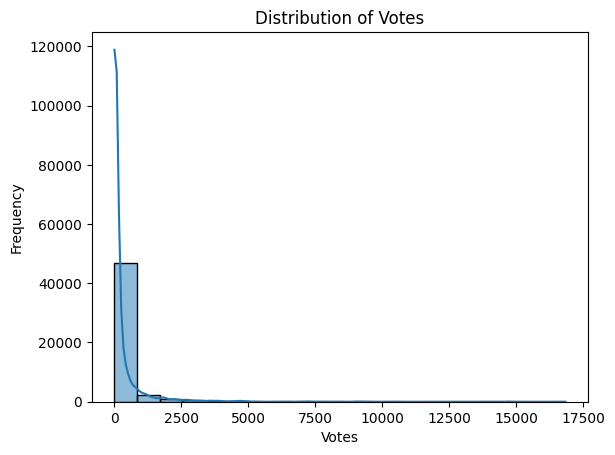

In [75]:
#Distribution of Votes column
sns.histplot(df['votes'], bins=20, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

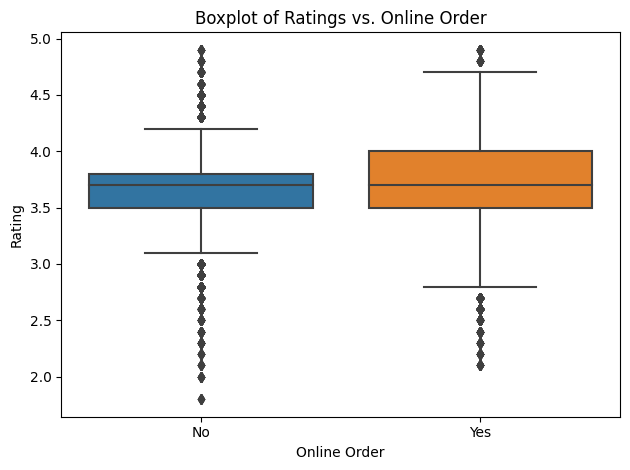

In [60]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Boxplot of Ratings vs. Online Order')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

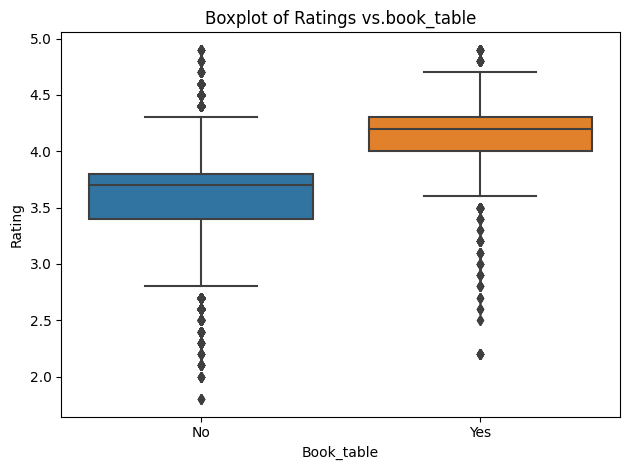

In [67]:
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Boxplot of Ratings vs.book_table')
plt.xlabel('Book_table')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

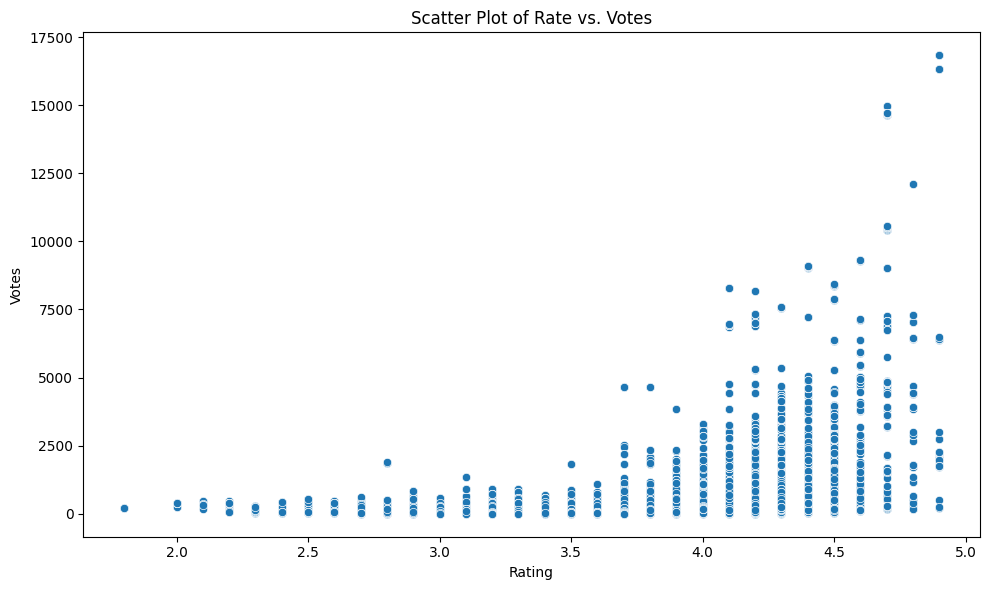

In [77]:
# Create a scatter plot between 'rate' and 'votes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='votes', data=df)
plt.title('Scatter Plot of Rate vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.tight_layout()
plt.show()

In [81]:
# Group by location and calculate average rating
location_avg_rating = df.groupby('location')['rate'].mean()

# Sort locations by average rating in descending order
top_locations = location_avg_rating.sort_values(ascending=False).head(10)

# Print the top 10 locations with highest average ratings
print(top_locations)

location
Lavelle Road             4.104477
St. Marks Road           4.017201
Koramangala 5th Block    3.983978
Koramangala 3rd Block    3.983308
Church Street            3.979170
Sankey Road              3.955572
Cunningham Road          3.894096
Koramangala 4th Block    3.880904
Rajarajeshwari Nagar     3.850000
Residency Road           3.845948
Name: rate, dtype: float64


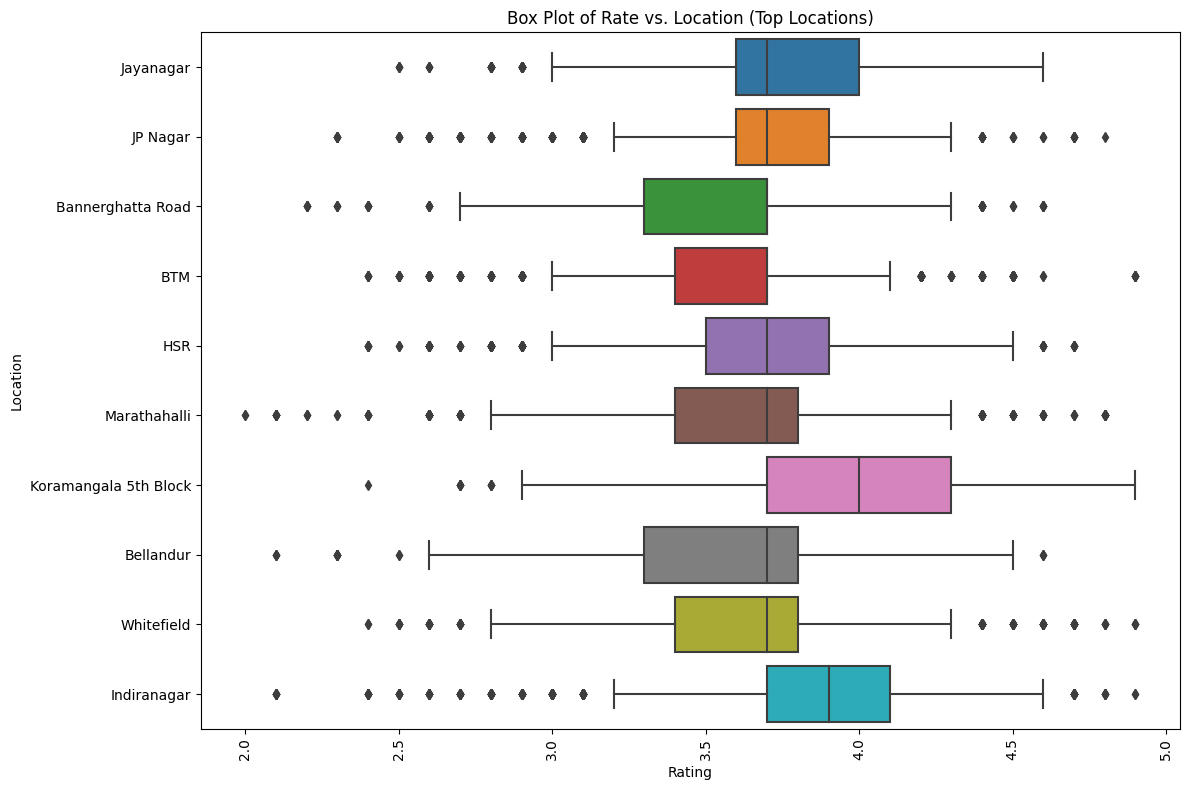

In [80]:

# Determine the top locations based on frequency
top_locations = df['location'].value_counts().head(10).index

# Filter the data to include only the top locations
filtered_data = df[df['location'].isin(top_locations)]

# Create a bar plot for rate vs. location
plt.figure(figsize=(12, 8))
sns.boxplot(x='rate', y='location', data=filtered_data)
plt.title('Box Plot of Rate vs. Location (Top Locations)')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

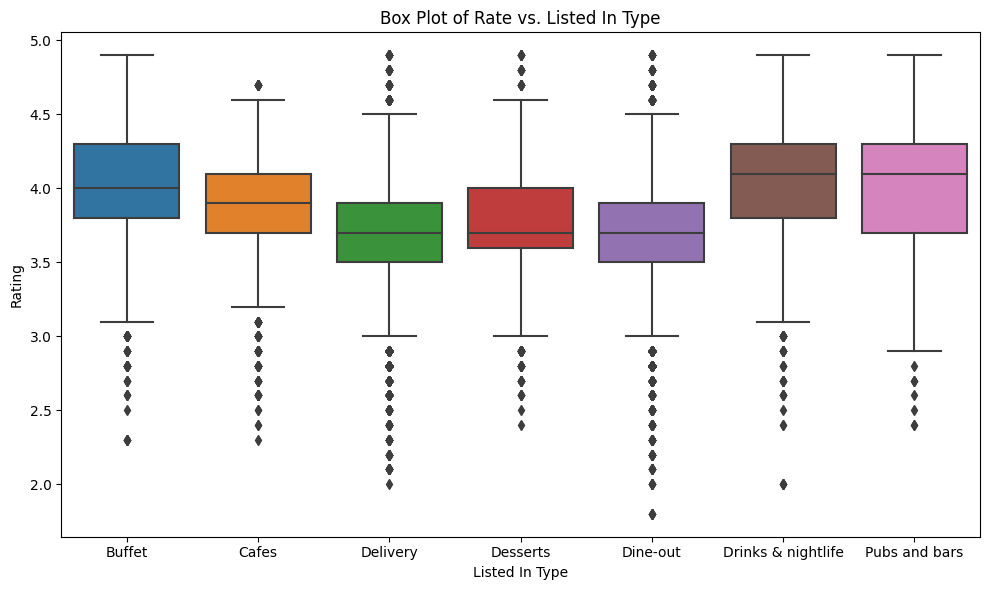

In [82]:
# Create a box plot for rate vs. listed in type
plt.figure(figsize=(10, 6))
sns.boxplot(x='listed_in(type)', y='rate', data=df)
plt.title('Box Plot of Rate vs. Listed In Type')
plt.xlabel('Listed In Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


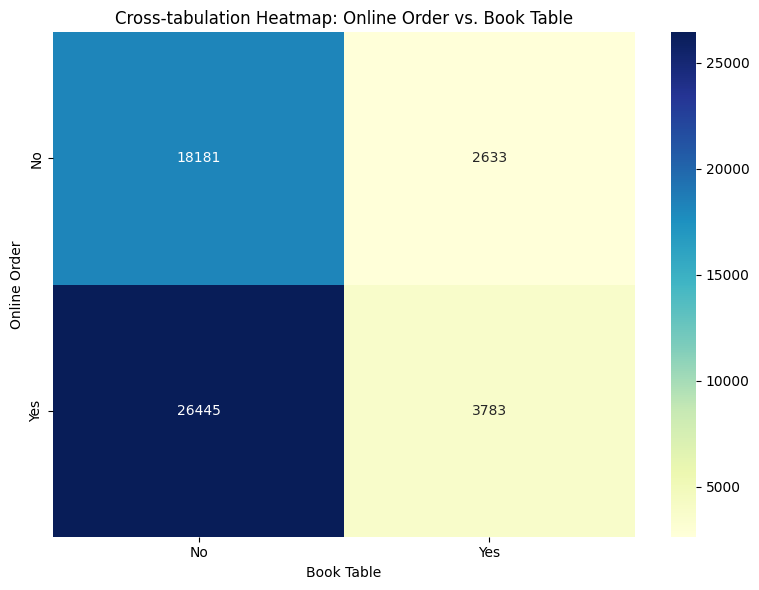

In [83]:
# Create a crosstab table between online_order and book_table
crosstab_table = pd.crosstab(df['online_order'], df['book_table'])

# Plot the crosstab table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-tabulation Heatmap: Online Order vs. Book Table')
plt.xlabel('Book Table')
plt.ylabel('Online Order')
plt.tight_layout()
plt.show()

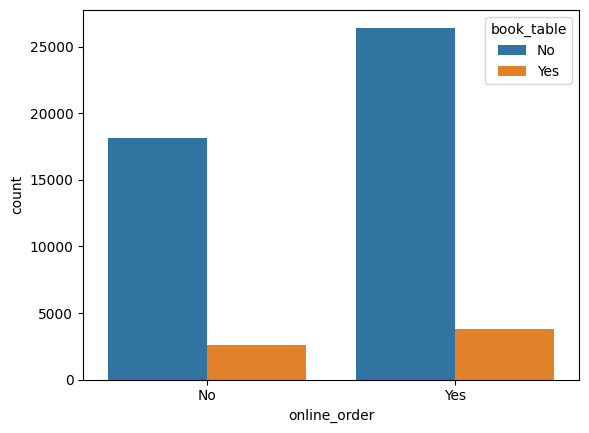

In [89]:
sns.countplot(x='online_order', hue='book_table', data=df)
plt.show()

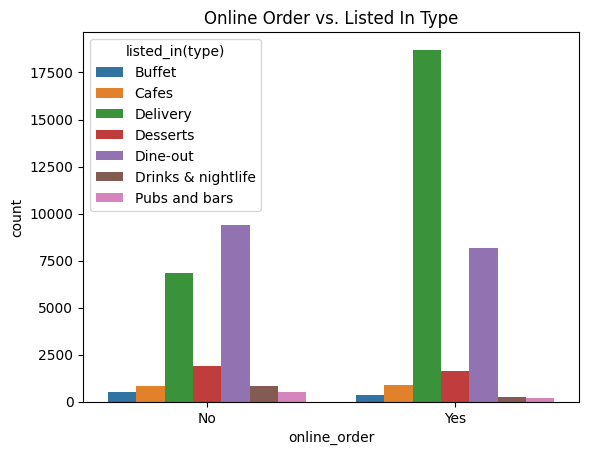

In [85]:
# Bar plot of Online Order vs. Listed In Type
sns.countplot(x='online_order', hue='listed_in(type)', data=df)
plt.title('Online Order vs. Listed In Type')
plt.show()

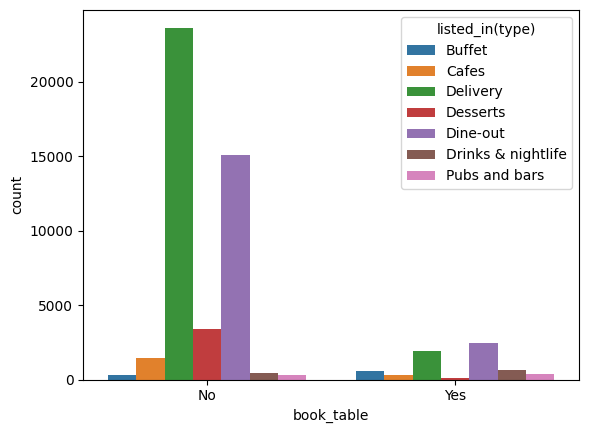

In [96]:
sns.countplot(x='book_table', hue='listed_in(type)', data=df)
plt.show()

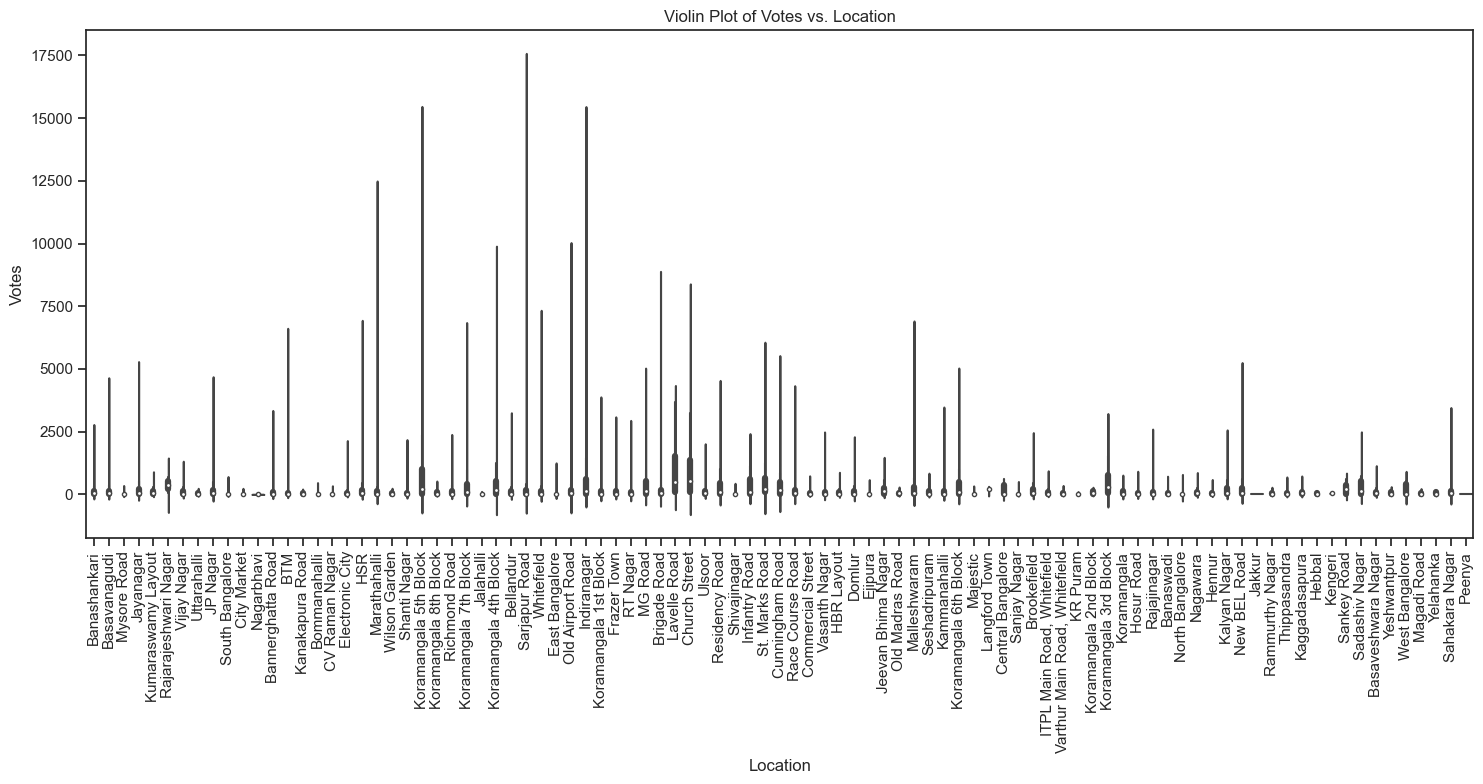

In [99]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='location', y='votes', data=data)
plt.title('Violin Plot of Votes vs. Location')
plt.xlabel('Location')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

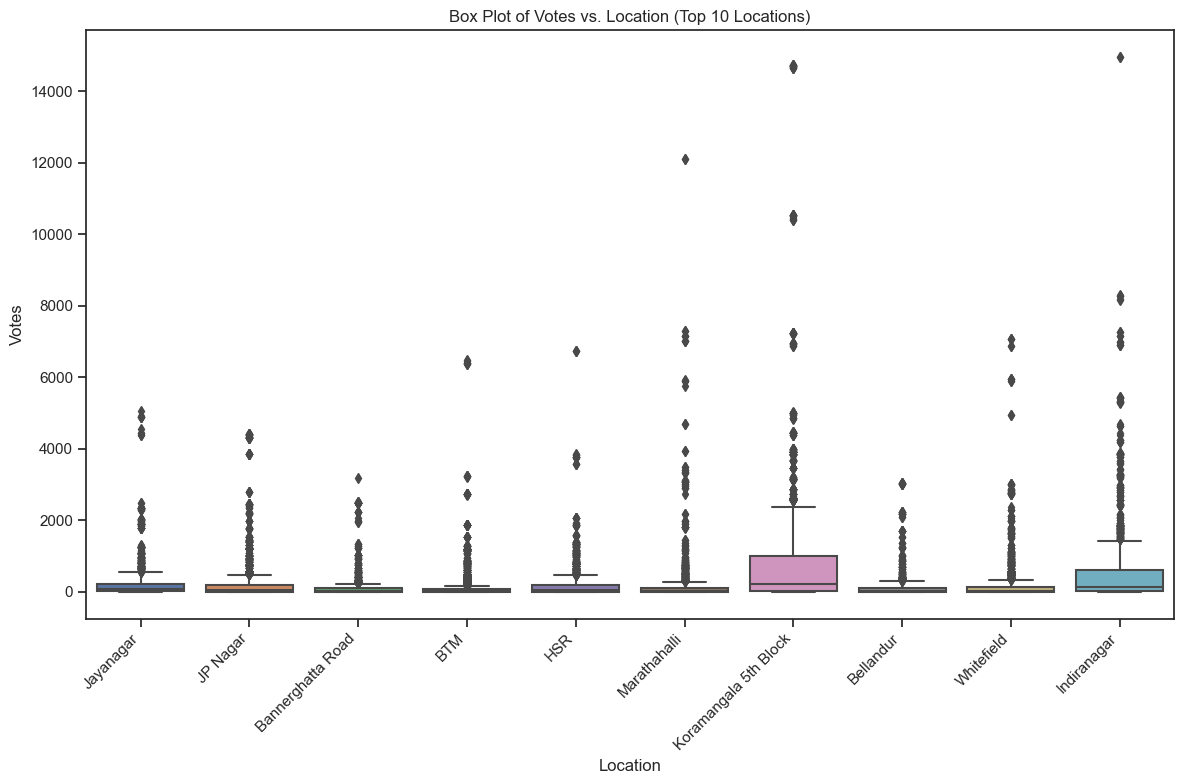

In [100]:
# Determine the top 10 locations based on vote counts
top_locations = data['location'].value_counts().head(10).index

# Filter the data to include only the top 10 locations
filtered_data = data[data['location'].isin(top_locations)]

# Create a box plot for votes vs. location
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='votes', data=filtered_data)
plt.title('Box Plot of Votes vs. Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

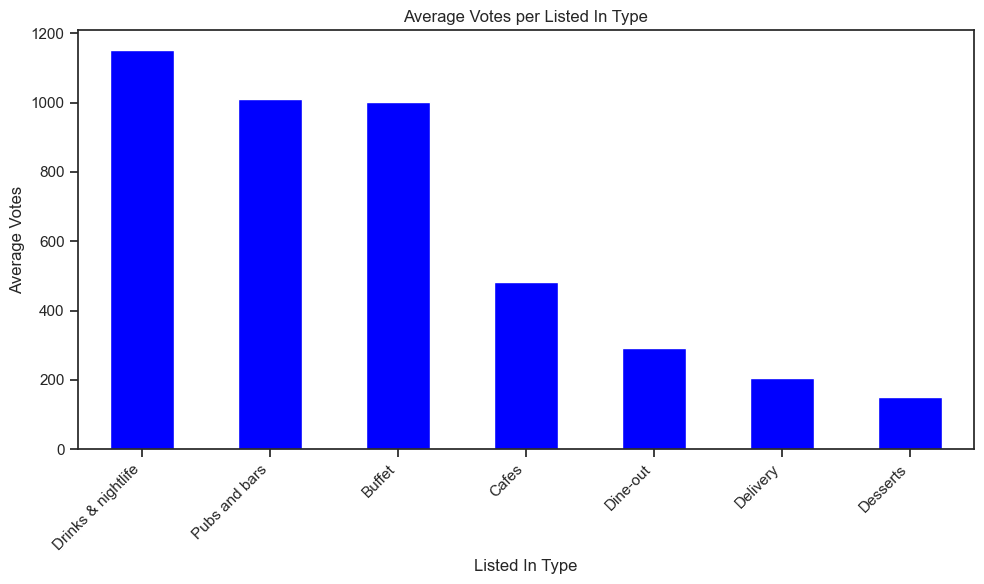

In [101]:
# Calculate the average votes per listed in type
avg_votes_per_type = data.groupby('listed_in(type)')['votes'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
avg_votes_per_type.plot(kind='bar', color='blue')
plt.title('Average Votes per Listed In Type')
plt.xlabel('Listed In Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

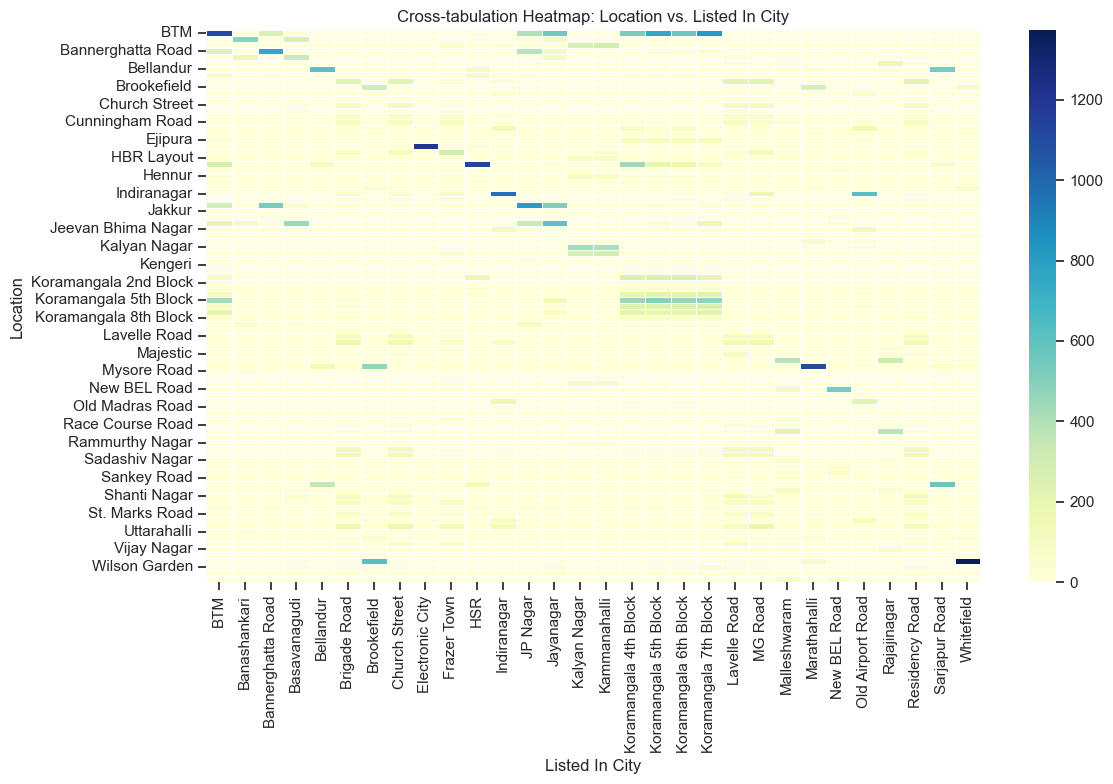

In [102]:
# Create a crosstab table between location and listed in city
crosstab_table = pd.crosstab(data['location'], data['listed_in(city)'])

# Plot the crosstab table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Cross-tabulation Heatmap: Location vs. Listed In City')
plt.xlabel('Listed In City')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

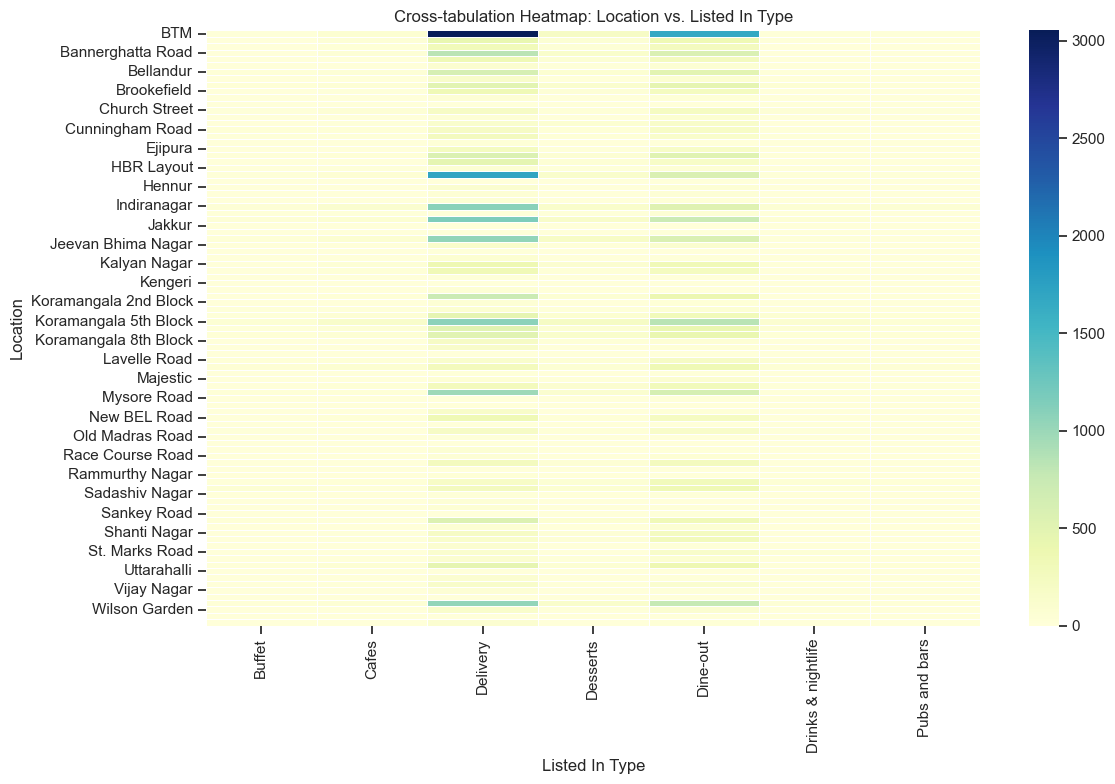

In [103]:
# Create a crosstab table between location and listed in type
crosstab_table = pd.crosstab(df['location'], df['listed_in(type)'])

# Plot the crosstab table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Cross-tabulation Heatmap: Location vs. Listed In Type')
plt.xlabel('Listed In Type')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

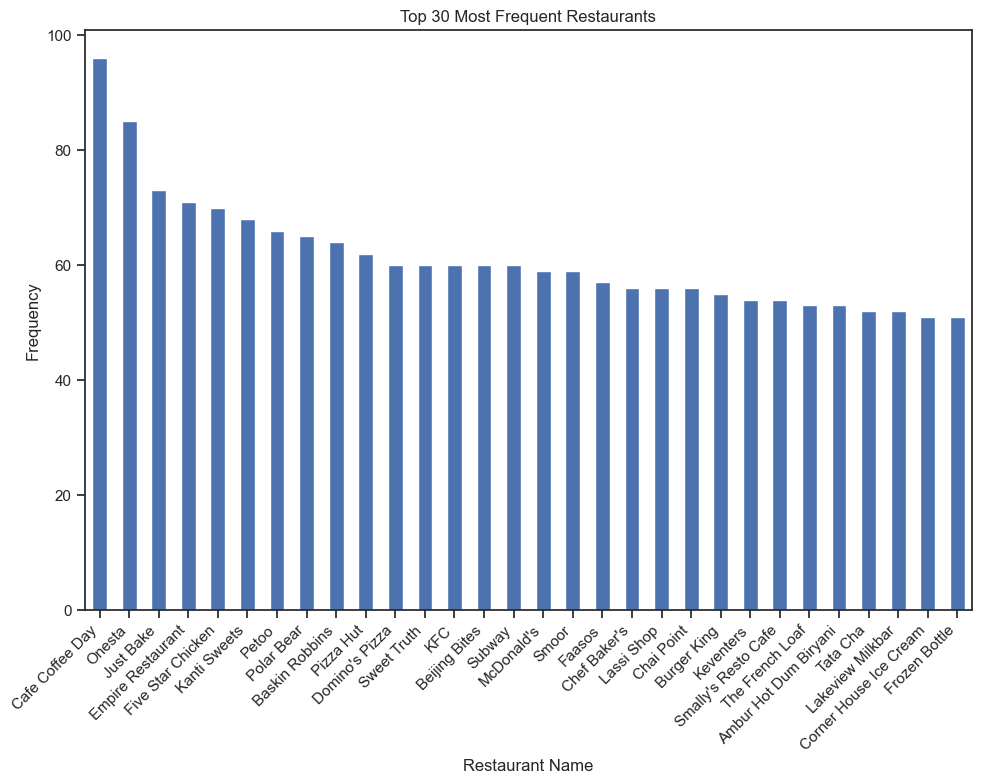

In [116]:
# Calculate the frequency of each restaurant's name
restaurant_frequency = df['name'].value_counts()

# Get the top 20 most frequent restaurant names
top_restaurants = restaurant_frequency.head(30)

# Create a bar chart for the top 20 restaurants
plt.figure(figsize=(10, 8))
top_restaurants.plot(kind='bar')
plt.title('Top 30 Most Frequent Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

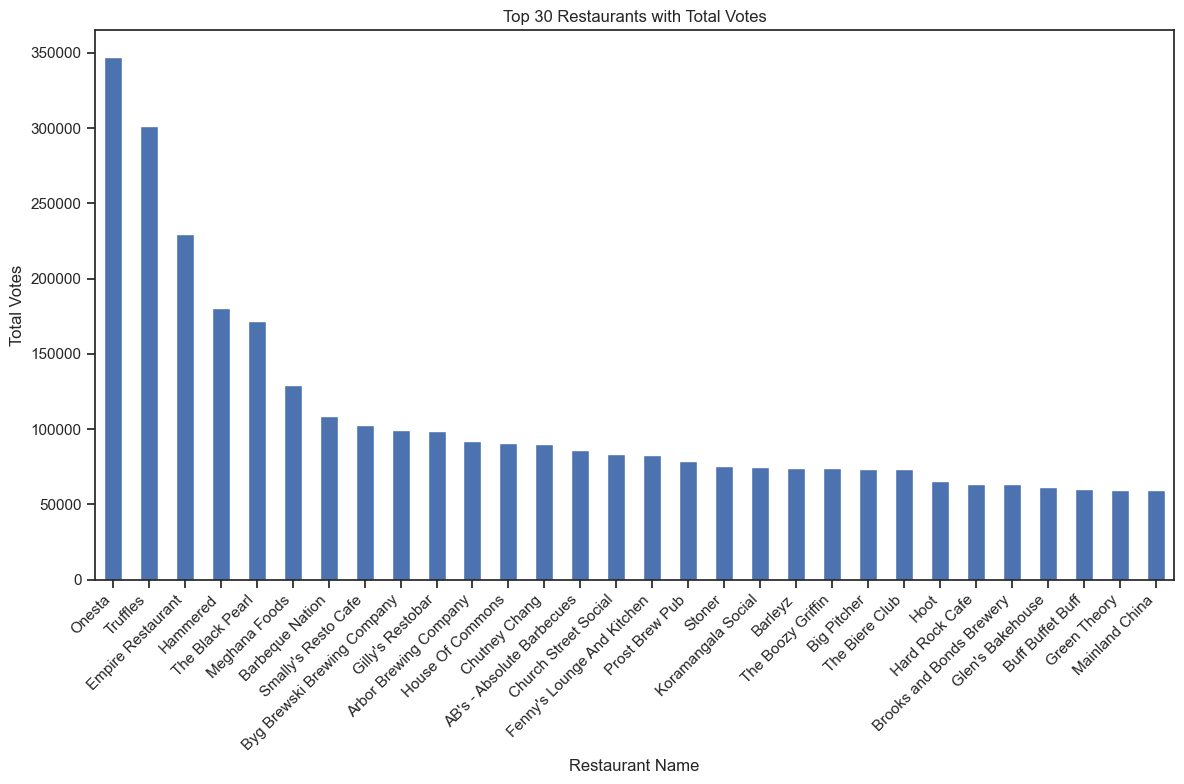

In [120]:
# Calculate the total votes for each restaurant
restaurant_total_votes = df.groupby('name')['votes'].sum()

# Get the top 30 restaurants with the highest total votes
top_restaurants = restaurant_total_votes.sort_values(ascending=False).head(30)

# Create a bar chart for the top 30 restaurants with their total votes
plt.figure(figsize=(12, 8))
top_restaurants.plot(kind='bar')
plt.title('Top 30 Restaurants with Total Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

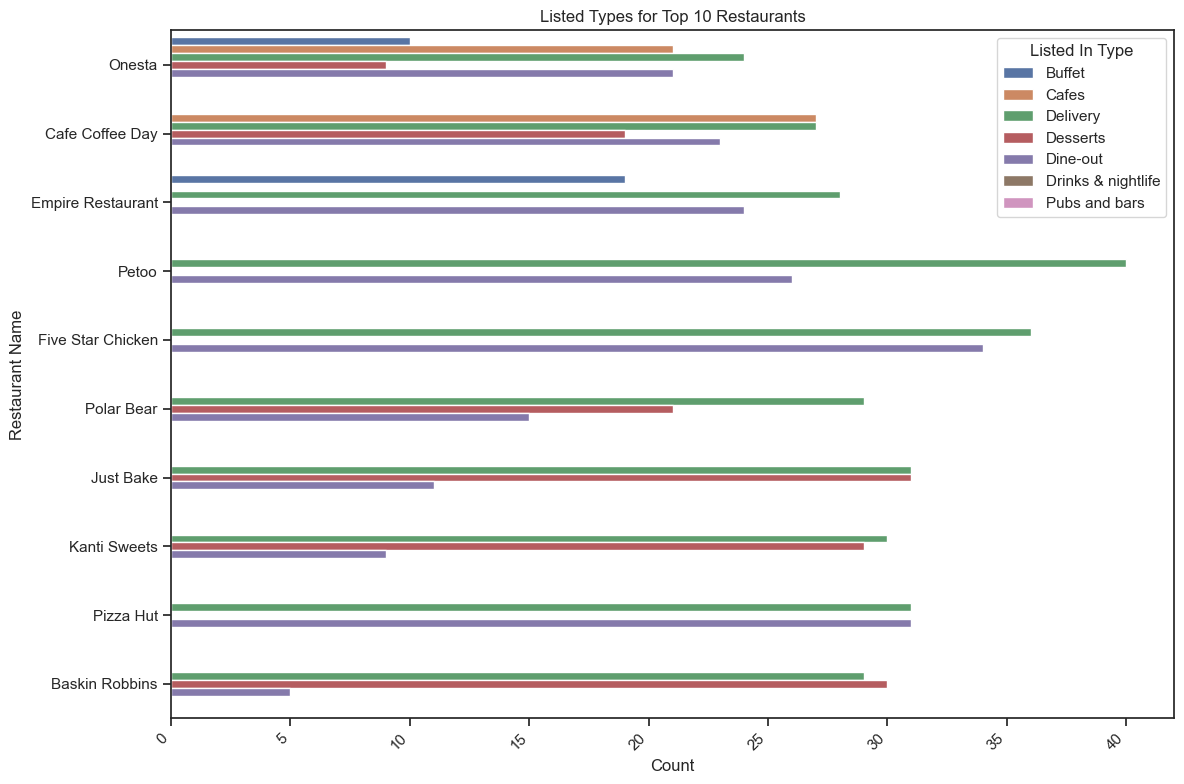

In [123]:
# Get the top 30 restaurants based on frequency
top_restaurants = df['name'].value_counts().head(10).index

# Create a DataFrame containing only the top restaurants
top_restaurants_data = df[df['name'].isin(top_restaurants)]

# Create a bar plot to display the listed types for the top restaurants
plt.figure(figsize=(12, 8))
sns.countplot(y='name', hue='listed_in(type)', data=top_restaurants_data)
plt.title('Listed Types for Top 10 Restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Listed In Type')
plt.show()

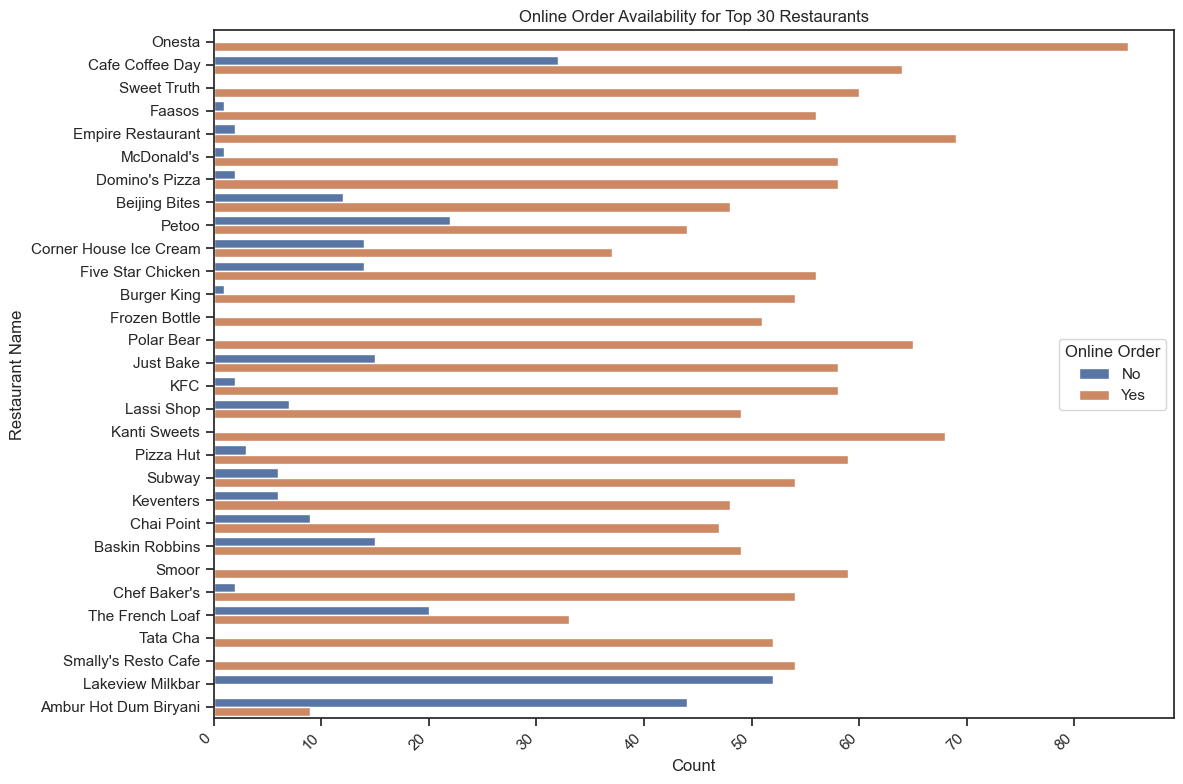

In [126]:
# Get the top 30 restaurants based on frequency
top_restaurants = data['name'].value_counts().head(30).index

# Create a DataFrame containing only the top restaurants
top_restaurants_data = data[data['name'].isin(top_restaurants)]

# Create a bar plot to display the online order availability for the top restaurants
plt.figure(figsize=(12, 8))
sns.countplot(y='name', hue='online_order', data=top_restaurants_data)
plt.title('Online Order Availability for Top 30 Restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Online Order')
plt.show()

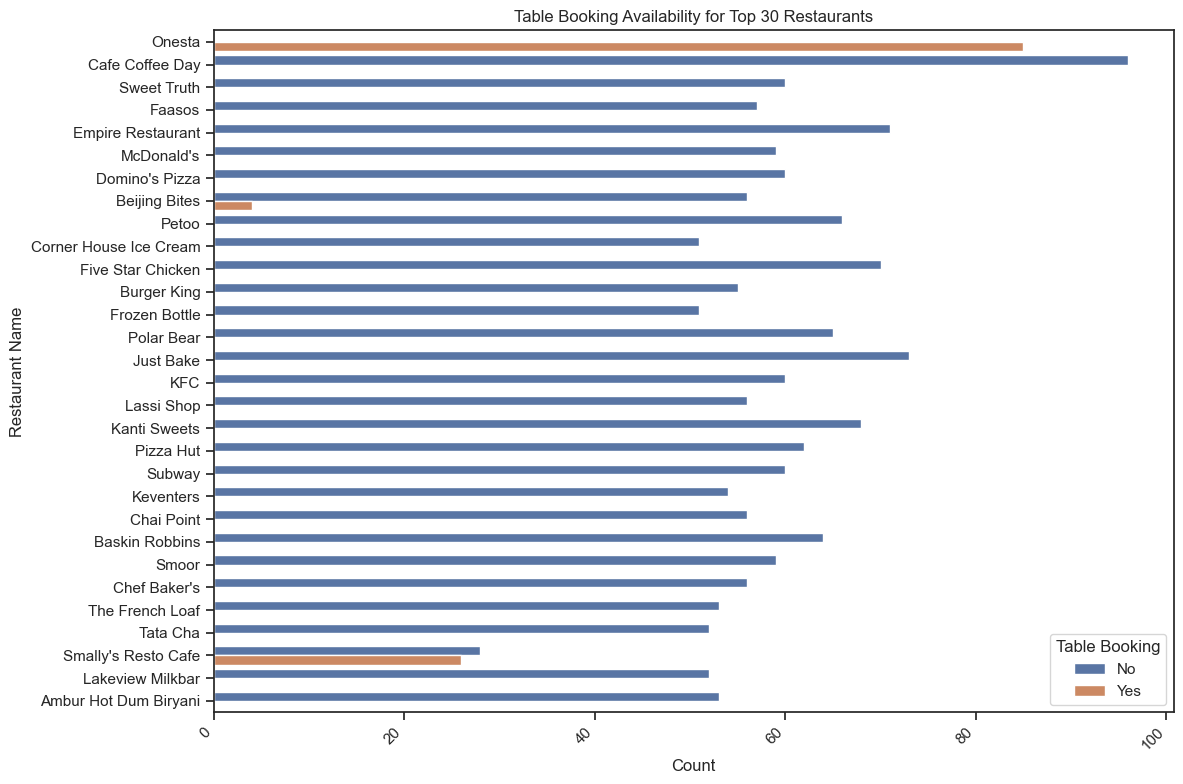

In [127]:
# Get the top 30 restaurants based on frequency
top_restaurants = data['name'].value_counts().head(30).index

# Create a DataFrame containing only the top restaurants
top_restaurants_data = data[data['name'].isin(top_restaurants)]

# Create a bar plot to display the table booking availability for the top restaurants
plt.figure(figsize=(12, 8))
sns.countplot(y='name', hue='book_table', data=top_restaurants_data)
plt.title('Table Booking Availability for Top 30 Restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Table Booking')
plt.show()

In [108]:
# Specify the filename for the CSV file
output_filename = 'zomato_1.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_filename, index=False)